# TP1 : Transformer de Fourier
Elwan LEFEVRE

## Intsallation des librairies

In [44]:
%pip install numpy
%pip install matplotlib
%pip install dataclasses

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Mise en place de l'environnement Python

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass, field

## 1. Signaux temporels

### 1.1 Signal sinusoidal
L’objectif  de  cette  partie  est  de  générer  des  séquences  en  échantillonnant  un  signal  sinusoïdal continu de fréquence $V_0$ :\
$S_1(t) = \cos(2\pi V_0t)$

In [46]:
# Definition des dataclasses

@dataclass
class Signal:
    # Classe représentant les caracteristique d'un signal
    f_0: float                              # Fréquence du signal
    time: float                             # Durée du signal
    f_ech: float                            # Fréquence d'échantillonage
    temps: list[float] = field(init=False)  # Liste des temps
    signal: list[float] = field(init=False) # Liste des valeurs du signal
    
    def __post_init__(self):
        self.temps = np.arange(0, self.time, 1/self.f_ech)
        
@dataclass      
class Signal_Cos(Signal):
    # Classe représentant un signal cosinus
    def __post_init__(self):
        super().__post_init__()
        self.signal = np.cos(2*np.pi*self.f_0*self.temps)
        
@dataclass       
class Signal_Sin(Signal):
    # Classe représentant un signal sinus
    def __post_init__(self):
        super().__post_init__()
        self.signal = np.sin(2*np.pi*self.f_0*self.temps)   

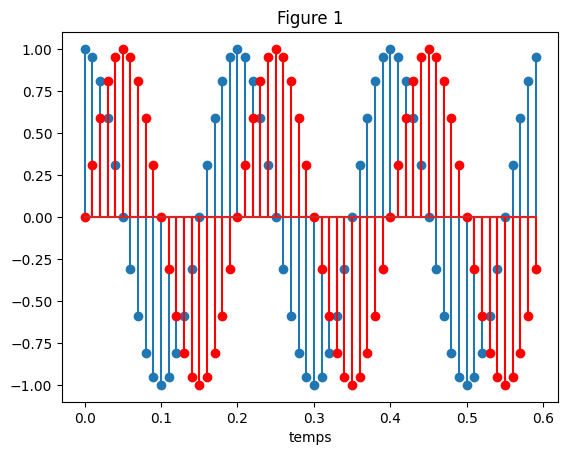

In [47]:
s1 : Signal_Cos = Signal_Cos(5, 600*10**-3, 100)
s4: Signal_Sin = Signal_Sin(5, 600*10**-3, 100)

#t,s1 = echantillone(data_signal1)


# Plot de la figure avec l'acces temps en x et s1 discret en y
plt.figure(1)
plt.stem(s1.temps,s1.signal)
plt.stem(s4.temps,s4.signal,'r')
plt.title('Figure 1')
plt.xlabel('temps')
plt.show()

### 1.2 Generation de `portes`
Nous souhaitons maintenant générer les séquences à partir de l’échantillonnage ($Ve = 100$Hz) des signaux continus suivants:

$s_2(t) = \Pi_T(t)$

$s_3(t) = \Pi_T(3t)$

Les séquences seront générées dans l’intervalle temporel suivant : $[-T,T[$, en prentant $T = 1s$.

1. [x] Construire un vecteur temps correstpondant a l'intervalle temporel souhaite.
2. [x] En vous aidant du paragraphe ci-dessous, construire les deux seauences $s_2$ et $s_3$.
3. [x] Afficher sur le meme graphe ;es deux sequences obtenues.

Afin de selectionner une plage d'indice d'un vecteur, il est possible d'utiliser une condition logique sur un autre vecteur : 
```python
B = np.arange(0,5,1) # B = [0 1 2 3 4]
A = np.array([6,5,4,3,2]) # A = [6 5 4 3 2]
A[B>2] = 0 # Mise à 0 des coefficients de A aux indices pourlesquels les coefficients de B sont strictement supérieursà 2,
print(A) # retourne [6 5 4 0 0]
```

In [54]:
@dataclass
class Signal_gate:
    # Classe representant les caracteristique d'un signal porte
    t: float                                # Temps de la porte
    f_ech: float                            # Frequence d'echantillonage
    indice:float = 1                        # Indice de la porte
    temps: list = field(init=False)         # Temps du signal
    signal: list = field(init=False)        # Signal discret
    ech_tf: int = 2048                      # Nombre d'echantillon pour la TF
    v_temps_tf: list = field(init=False)    # Temps de la TF
    signal_tf: list = field(init=False)     # Signal de la TF
    signal_tf_inv: list = field(init=False) # Signal de la TF inverse
    
    
    def __post_init__(self):
        self.temps = np.arange(- self.t, self.t,
                               1/self.f_ech)
        self.signal = np.ones(len(self.temps))
        self.signal[self.temps*self.indice>self.t/2] = 0
        self.signal[self.temps*self.indice<-self.t/2] = 0
        self.v_temps_tf = np.linspace(-2*self.f_ech,
                                      2*self.f_ech,self.ech_tf)
        self.signal_tf = np.zeros(len(self.v_temps_tf)
                                  ,dtype=complex)
        d=0
        for i in self.v_temps_tf:
            self.signal_tf[d] = np.trapz(self.signal*np.exp(-2*1j*np.pi*i*self.temps),
                                         x=self.temps)
            d+=1
        self.signal_tf_inv = np.zeros(len(self.v_temps_tf),
                                      dtype=complex)
        d=0
        for i in self.temps:
            self.signal_tf_inv[d] = np.trapz(self.signal_tf*np.exp(2*1j*np.pi*i*self.v_temps_tf),
                                             x=self.v_temps_tf)
            d+=1

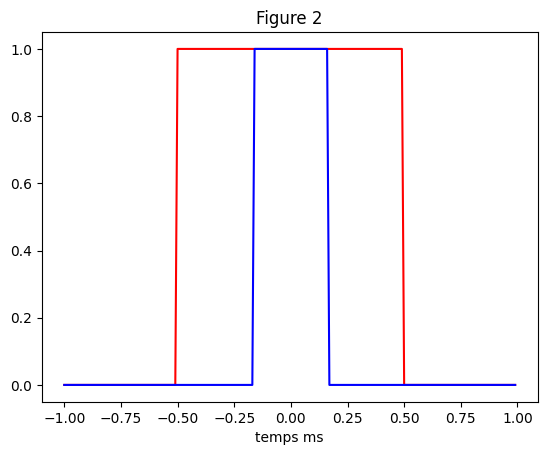

In [55]:
s2: Signal_gate = Signal_gate(1,100)
s3: Signal_gate = Signal_gate(1,100,3)

plt.figure(2)
plt.plot(s2.temps,s2.signal,'r')
plt.plot(s3.temps,s3.signal,'b')
plt.title('Figure 2')
plt.xlabel('temps ms')
plt.show()

## 2. Transformee de Fourier

$S2(\nu) = \int_\mathcal{R} \Pi(t)e^{-2i\pi\nu t}dt=sinc(\pi\nu)$

$S3(\nu) = \int_\mathcal{R} \Pi(3t)e^{-2i\pi\nu t}dt = 3sinc(3\pi\nu)$

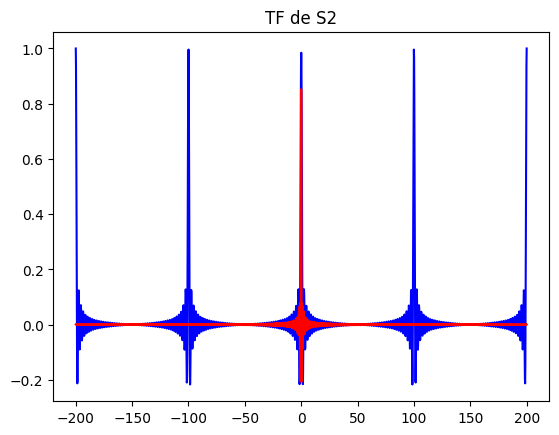

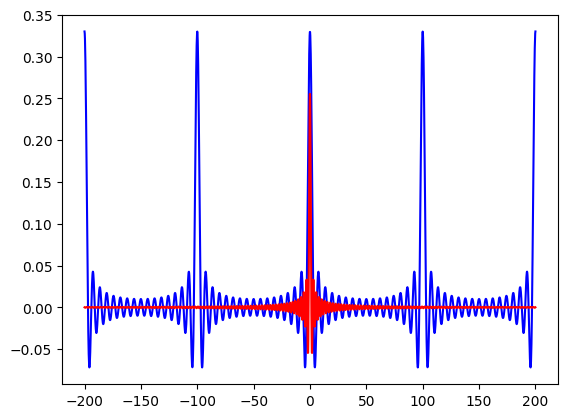

In [50]:
S2_an = s2.indice*np.sinc(s2.indice*s2.v_temps_tf*np.pi) # TF Analogue de la porte 2
S3_an = s3.indice*np.sinc(s3.indice*s3.v_temps_tf*np.pi) # TF Analogue de la porte 3

plt.figure(3)
plt.title('TF de S2')
plt.plot(s2.v_temps_tf,s2.signal_tf.real,'b')
plt.plot(s2.v_temps_tf,S2_an,'r')
plt.show()

plt.figure(4)
plt.plot(s3.v_temps_tf,s3.signal_tf.real,'b')
plt.plot(s3.v_temps_tf,S3_an,'r')

plt.show()

* On observe la periodisation du signal
* La frequence d'echantillonage joue sur la forme obeserve. Si la frequence est trops reduit, on perds des donnes. A l'inverse, si elle est trops grande, on reduit le nombre de multiplication temporel dans le domaine de fourier

## Transformee de Fourier inverse

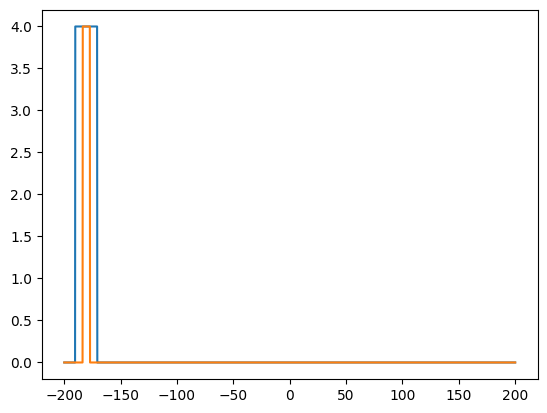

In [51]:
plt.figure(5)
plt.plot(s2.v_temps_tf,s2.signal_tf_inv.real)
plt.plot(s3.v_temps_tf,s3.signal_tf_inv.real)
plt.show()